### **Multilayer Perceptron for Regression**
- Just remove the output layers
  - We need the continuous value as output

### **Loss function**
**Mean Squared Error**
$$
MSE = \frac{1}{N}\sum^{N}_{i = 1}(y^{[i]} - \hat{y}^{[i]})^{2}
$$

In [1]:
import torch

import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader, Dataset

In [2]:
X_train = torch.tensor([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0]).view(-1, 1)
y_train = torch.tensor([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

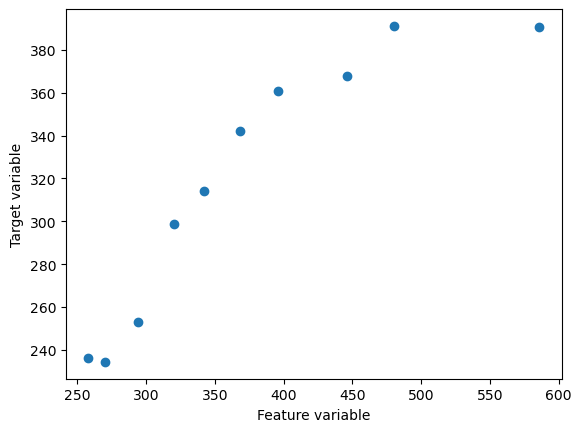

In [3]:
plt.scatter(X_train, y_train)
plt.xlabel("Feature variable")
plt.ylabel("Target variable")

plt.show()

### **Multilayer Perceptron**

In [4]:
class MLP(torch.nn.Module):
  def __init__(self, num_features):
    super().__init__()

    self.layers = torch.nn.Sequential(
      # 1st hidden layer
      torch.nn.Linear(num_features, 50),
      torch.nn.ReLU(),

      # 2nd hidden layer
      torch.nn.Linear(50, 25),
      torch.nn.ReLU(),

      # Output layer
      torch.nn.Linear(25, 1)  # As there is only 1 output node
    )
  
  def forward(self, x):
    logits = self.layers(x).flatten()
    return logits

**Normalize**

In [5]:
X_train_norm = (X_train - X_train.mean()) / X_train.std()
y_train_norm = (y_train - y_train.mean()) / y_train.std()

### **Define the dataset**

In [6]:
class MyDataset(Dataset):
  def __init__(self, X, y):
    self.features = X
    self.targets = y
  
  def __getitem__(self, idx):
    x = self.features[idx]
    y = self.targets[idx]

    return x, y
  
  def __len__(self):
    return self.targets.shape[0]

In [7]:
train_ds = MyDataset(X_train_norm, y_train_norm)

train_loader = DataLoader(
  dataset = train_ds,
  batch_size = 20,
  shuffle = True
)

### **Define the training loop**

In [8]:
torch.manual_seed(1)
model = MLP(num_features = 1)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [9]:
epochs = 30
loss_list = []
train_acc_list = []
val_acc_list = []

In [10]:
for epoch in range(epochs):
  model = model.train()

  for batch_idx, (features, targets) in enumerate(train_loader):
    logits = model(features)
    loss = F.mse_loss(logits, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if not batch_idx % 250:
      print(
        f"Epoch: {epoch + 1:03d}/{epochs:03d}"
        f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
        f" | Train loss: {loss:.2f}"
      )
    loss_list.append(loss.item())

Epoch: 001/030 | Batch 000/001 | Train loss: 0.86
Epoch: 002/030 | Batch 000/001 | Train loss: 0.63
Epoch: 003/030 | Batch 000/001 | Train loss: 0.45
Epoch: 004/030 | Batch 000/001 | Train loss: 0.29
Epoch: 005/030 | Batch 000/001 | Train loss: 0.18
Epoch: 006/030 | Batch 000/001 | Train loss: 0.11
Epoch: 007/030 | Batch 000/001 | Train loss: 0.08
Epoch: 008/030 | Batch 000/001 | Train loss: 0.07
Epoch: 009/030 | Batch 000/001 | Train loss: 0.06
Epoch: 010/030 | Batch 000/001 | Train loss: 0.05
Epoch: 011/030 | Batch 000/001 | Train loss: 0.05
Epoch: 012/030 | Batch 000/001 | Train loss: 0.04
Epoch: 013/030 | Batch 000/001 | Train loss: 0.04
Epoch: 014/030 | Batch 000/001 | Train loss: 0.04
Epoch: 015/030 | Batch 000/001 | Train loss: 0.03
Epoch: 016/030 | Batch 000/001 | Train loss: 0.03
Epoch: 017/030 | Batch 000/001 | Train loss: 0.03
Epoch: 018/030 | Batch 000/001 | Train loss: 0.02
Epoch: 019/030 | Batch 000/001 | Train loss: 0.02
Epoch: 020/030 | Batch 000/001 | Train loss: 0.02


### **Get predictions**

In [11]:
model.eval()

X_range = torch.arange(150, 800, 0.1).view(-1, 1)
X_range_norm = (X_range - X_range.mean()) / X_range.std()

In [12]:
with torch.inference_mode():
  y_hat_norm = model(X_range_norm)

**Undo the normalization**

In [13]:
y_hat = y_hat_norm * y_train.std() + y_train.mean()

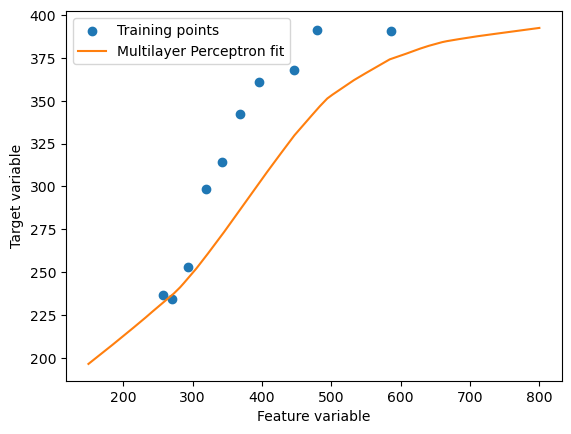

In [14]:
plt.scatter(X_train, y_train, label = "Training points")
plt.plot(X_range, y_hat, color = "C1", label = "Multilayer Perceptron fit", linestyle = "-")

plt.xlabel("Feature variable")
plt.ylabel("Target variable")
plt.legend()

plt.show()

uhmmmm, something happened here